In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


In [2]:
Crime_Data = pd.read_csv("crime_data.csv")
Crime_Data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Data Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(Crime_Data.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


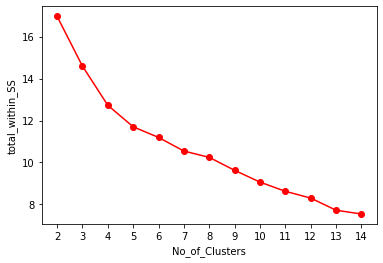

In [4]:
# To genrate Elbow Plot to find no. of clusters required
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()

# From the above plot we could choose cluster size as 5

In [5]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)
model.labels_ 
md=pd.Series(model.labels_) 
Crime_Data['clust']=md 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [6]:
Crime_Data = Crime_Data.iloc[:,[5,0,1,2,3,4]]

Crime_Data.iloc[:,1:7].groupby(Crime_Data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,7.218182,152.636364,62.363636,20.072727
1,10.966667,264.000000,76.500000,33.608333
2,2.827273,73.000000,52.000000,11.418182
3,14.671429,251.285714,54.285714,21.685714
4,4.955556,125.444444,80.111111,17.788889


## Therefore, based on variables(murder,population,etc) we could cluster in 5 groups.